In [1]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in '%s': %s" % (cwd, files))

Files in 'C:\Users\cmebr\OneDrive\Documents\GitHub\Math-10\Final Project': ['.ipynb_checkpoints', 'cnnpred.csv', 'Final Project CNN-Chad.ipynb', 'foo.csv', 'kmnist-test-imgs-perm.npz', 'kmnist-train-imgs.npz', 'kmnist-train-labels.npz', 'uci-math-10-winter2019.zip', 'Y-random.csv', 'Y-solutions-orig.csv']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [3]:
#Load the data
train_imgs = np.load('kmnist-train-imgs.npz')['arr_0']
train_labels = np.load('kmnist-train-labels.npz')['arr_0']
test_imgs = np.load('kmnist-test-imgs-perm.npz')['arr_0']

This is what our data looks like per image.

In [4]:
train_imgs[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  10,   7, 233,  86,   0,
          0,  32,  99,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 255,  84,   0,
          0,   7, 151,  19,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 152, 251,  14,   0,
          0,  25, 155,  98,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 129, 248, 188,   0,   0,
          0,  80, 250, 191,   1,  78,  51,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  87, 217,  62,   0,   0,
          0,  66, 255, 254, 225, 234, 160,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,
          4,  93, 247, 244, 184,  95, 132,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Now let's look at the images

These are just some of the ones that are type 1

1
1
1


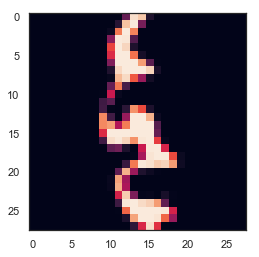

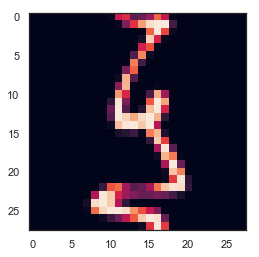

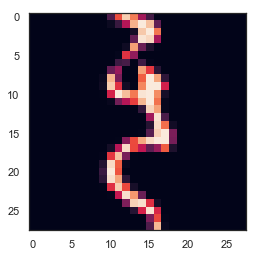

In [5]:
for i in [3,8,9]:
    plt.figure()
    plt.imshow(train_imgs[i])
    print(train_labels[i])

These actually look similar, okay.

(array([6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000., 6000.,
        6000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

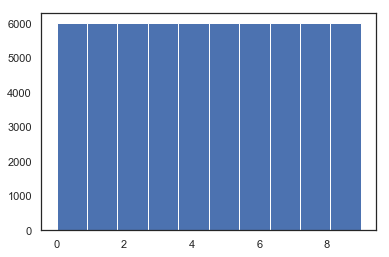

In [6]:
plt.hist(train_labels, bins = 10)

6000 of each categorie, just like the Prof said.

In [7]:
max_val = []
for i in range(len(train_imgs)):
    max_val.append(np.max(train_imgs[i]))
max_val

[255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 251,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255

So let's normalize the values in each image to be from 0 to 1 instead of 0 to 255.

In [8]:
train_imgs = train_imgs/255
test_imgs = test_imgs/255

Now let's see

In [9]:
train_imgs[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.03921569, 0.02745098,
        0.91372549, 0.3372549 , 0.        , 0.        , 0.1254902 ,
        0.38823529, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.21176471,
        1.        , 0.32941176, 0.        , 0.        , 0.02745098,
        0.59215686, 0.0745098 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.59607843,
        0.98431373, 0.05490196, 0.        , 0.        , 0.09803922,
        0.60784314, 0.3843

Okay better. Let's look at the images again.

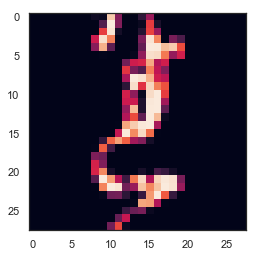

In [10]:
plt.imshow(train_imgs[0])

Looks the same to me. This should help our NN converge faster and also just makes everything a little more uniform.

In [11]:
train_imgs = np.reshape(train_imgs,(60000,28,28,1))

In [12]:
#Add extra dimension for canal, imgs are greyscale so we only need one, if RGB we'd need 3
np.shape(train_imgs)

(60000, 28, 28, 1)

In [13]:
#Now hot encode our labels into vectors s.t. 1-> [0,1,0,0,0,0,0,0,0,0] and 9->[0,0,0,0,0,0,0,0,0,1]
nb_classes = 10
targets = train_labels.reshape(-1)
train_labels = np.eye(nb_classes)[targets]

In [14]:
X_train, X_val, Y_train, Y_val = train_test_split(train_imgs, train_labels, test_size = 0.0, random_state=13)

# Neural Net Time

In [15]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [16]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [17]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [18]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [19]:
epochs = 20
batch_size = 86

In [20]:
# Fit the model
history = model.fit(x = X_train, y = Y_train,
                            epochs = epochs, verbose = 1, 
                            callbacks=[learning_rate_reduction])

Epoch 1/20


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}} = Conv2D[T=DT_FLOAT, _class=["loc:@training/RMSprop/gradients/conv2d_1/convolution_grad/Conv2DBackpropFilter"], data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training/RMSprop/gradients/conv2d_1/convolution_grad/Conv2DBackpropFilter-0-TransposeNHWCToNCHW-LayoutOptimizer, conv2d_1/kernel/read)]]
	 [[{{node metrics/acc/Mean/_97}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_897_metrics/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [ ]:
prediction = model.predict(X_val)
print(prediction)

In [ ]:
pred = np.zeros_like(prediction)
pred[np.arange(len(prediction)), prediction.argmax(1)] = 1
print(pred)
print(Y_val)

In [ ]:
final = (pred - Y_val)
errs = np.where(final > 0)[0]
errs

In [ ]:
err = len(errs)/len(Y_val)
accuracy = 1 - err
print(accuracy)

In [ ]:
sum(train_labels[errs])

In [ ]:
model.evaluate(X_val,Y_val)

In [ ]:
X_pred = np.load('kmnist-test-imgs-perm.npz')['arr_0']
X_pred = X_pred/255
X_pred = np.reshape(X_pred,(10000,28,28,1))

In [ ]:
prediction = model.predict(X_pred)
y_pred = np.zeros_like(prediction)
y_pred[np.arange(len(prediction)), prediction.argmax(1)] = 1

In [ ]:
solutions = np.zeros((10000, 2))
solutions[:,0] = np.arange(1,10001)
solutions[:,1] = y_pred
solutions = solutions.astype(int)
np.savetxt("solutions-yournames.csv", solutions, 
           fmt='%s', header = 'Id,Category', delimiter = ',', comments='')

In [ ]:
y_random = np.random.randint(low=0, high=9, size=10000)
solutions_random = np.zeros((10000, 2))
solutions_random[:,0] = np.arange(1,10001)
solutions_random[:,1] = y_random
solutions_random = solutions_random.astype(int)
np.savetxt("solutions-random.csv", solutions_random, 
           fmt='%s', header = 'Id,Category', delimiter=',', comments='')